In [32]:
# Read data
rawdata = readdlm("binary.csv", ',')
y = float64(rawdata[2:401,1])'
ou = [ones(400,1) float64(rawdata[2:401,2:3])]'

# scale the GRE score
# It is necessary becasue the scale of GRE and GPA are very different.
u = copy(ou)
u[2,:] = ou[2,:] / 400

# Objective function
function f(x) 
    ansi = [ -(y[i] * (x'*u[:,i]) - log(1+exp(x'*u[:,i]))) for i = 1:400]
    return sum(ansi)
end

# Gradient of Objective function
function grad(x)
    wi = Float64[ -(y[i] - exp(x'*u[:,i])/(1+exp(x'*u[:,i])))[] for i = 1:400]
    ans = zeros(3)
    for i = 1:400
        ans = ans + wi[i] * u[:,i]
    end
    return ans
end

# Gradient Descent Algorithm
function gradDescent(x0, step_size, tol)
    
    # Estimating Lipzchits constant of gradient
    # with the Hessian
    H = zeros(3,3)
    for i = 1:400
       H = H + u[:,i] * u[:,i]'
    end
    (D,) = eig(H)
    L = maximum(D)/4
    α = (1/L)*1.1
    
    # Gradient Descent
    xnew = x0
    for i in 1:step_size
        xold = xnew
        xnew = xold - α * grad(xold)
        if norm(xold - xnew, Inf) < tol 
            break
        end
    end
    return xnew 
end


gradDescent (generic function with 1 method)

In [33]:
# Initial x
# I choose it so it is close to the solution
x0 = [-5,0,0.75]

# Gradient descent
xstar = gradDescent(x0, 1000, 0.0000001)

# Initial f(x)
f(x0)
# Final f(x)
f(xstar)

# Scale the solution to original data scale
xstar[2] = xstar[2] / 400

# The solution
xstar


3-element Array{Float64,1}:
 -4.92518   
  0.00263116
  0.758182  

In [34]:
# The solution
println("a is ", xstar[2:3])
println("beta is ", xstar[1])

a is [0.002631164386294417,0.758182243565612]
beta is -4.925184401812079


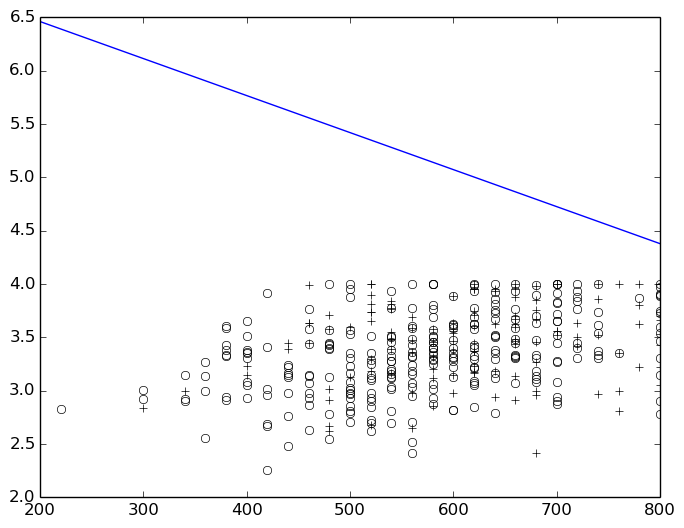

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7ff501888950>

In [37]:
# plot GPA vs GRE
using PyPlot

pos_index = find(y .> 0.5)
plot(ou[2,pos_index], ou[3,pos_index], "+", color = "k")
neg_index = find(y .< 0.5)
plot(ou[2,neg_index], ou[3,neg_index], "o", markerfacecolor = "None", color = "k")

# plot the decision boundary
rx = 200:1:800
ry = (0.5-xstar[1] - xstar[2] * rx)/xstar[3]
plot(rx, ry)